In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported f

# **Loading & Reading the Dataset**

In [ ]:
data = pd.read_csv('training_variants')
dat = pd.read_csv('Reviews.csv',engine='python' )

print('Number of data points : ', dat.shape)

print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  (36305, 10)
Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [ ]:
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()


Number of data points :  170
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

# **Preprocessing of Text**

In [ ]:
#Preprocessing Text
#removing the html tags
#Remove any punctuations or limited set of special characters like , or . or # etc.
#Check if the word is made up of english letters and is not alpha-numeric
#Convert the word to lowercase
#Remove Stopwords
#Snowball Stemming the word
from bs4 import BeautifulSoup
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

snow = SnowballStemmer(language='english')
def nlpr(t, index , column):
   if type(t) is not int:
        string = ""
        
        example1 = BeautifulSoup(t)
        t = example1.get_text()
        # replace every special char with space
        t = re.sub('\W', ' ', t)
        t = re.sub('\d', ' ', t)
        #t = re.sub(r'[@|#|$|%|^|&|*|(|_|-|)]', r' ', t)


        # replace multiple spaces with single space
        t = re.sub('\s+',' ', t)
        # converting all the chars into lower-case.
        t = t.lower()
        
        t = snow.stem(t)

       
        
        for word in t.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(data_text['TEXT'].head())
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlpr(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)

0    Cyclin-dependent kinases (CDKs) regulate a var...
1     Abstract Background  Non-small cell lung canc...
2     Abstract Background  Non-small cell lung canc...
3    Recent evidence has demonstrated that acquired...
4    Oncogenic mutations in the monomeric Casitas B...
Name: TEXT, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

print(data_text['TEXT'].head())

0    cyclin dependent kinases cdks regulate variety...
1    abstract background non small cell lung cancer...
2    abstract background non small cell lung cancer...
3    recent evidence demonstrated acquired uniparen...
4    oncogenic mutations monomeric casitas b lineag...
Name: TEXT, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer() 
 


tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(data_text['TEXT'])


print("some sample features(unique words in the corpus)",tfidf.get_feature_names())



some sample features(unique words in the corpus) ['__', '___', '________________________________________', '__um', '_a', '_akt_', '_ala', '_alk_', '_asn', '_asp', '_b', '_braf', '_braf_', '_c', '_cys', '_d', '_de', '_e', '_egfr', '_egfr_', '_erbb', '_feb', '_g', '_glu', '_glufsx', '_h', '_her', '_his', '_in', '_k', '_kras_', '_l', '_lys', '_m', '_map', '_mek', '_mol', '_n', '_n_', '_nras_', '_p', '_p_', '_pik', '_pro', '_s', '_ser', '_sjl', '_splice', '_t', '_t_', '_thr', '_tyr', '_v', '_val', '_y', '_â', 'aa', 'aaa', 'aaaagagaca', 'aaaaggtgggcctgaggttca', 'aaacccatccctgtctaccc', 'aaat', 'aaataatcagtgtgattcgtggag', 'aaatagcctcaattcttacc', 'aaatgttgatgagataatgactgat', 'aac', 'aacccccac', 'aacggagctc', 'aacgtgaccg', 'aaclys', 'aacr', 'aacr_', 'aacrjournals', 'aactttgggcgactatctgc', 'aad', 'aag', 'aagaagtgtcccattaattatgtggt', 'aagccgaagggctcccactg', 'aagctccccfaccatgact', 'aaggcagaaactggctgttg', 'aagggcatgagctgcgtgat', 'aagt', 'aagttaaaattcccgtcgctatca', 'aagttttttggggtcgaggt', 'aaltonen'

In [ ]:
result = pd.merge(data, data_text,on='ID', how='left')
result.head()
result[result.isnull().any(axis=1)]


,ID,Gene,Variation,Class,TEXT
170,170,EGFR,EGFRvV,7,NaN
171,171,EGFR,A859_L883delinsV,2,NaN
172,172,EGFR,E709Q,2,NaN
173,173,EGFR,E804G,7,NaN
174,174,EGFR,A750_E758del,7,NaN
...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,NaN
3317,3317,RUNX1,A122*,1,NaN
3318,3318,RUNX1,Fusions,1,NaN
3319,3319,RUNX1,R80C,4,NaN


In [ ]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']
result[result['ID']==1109]
result[result.isnull().any(axis=1)]




,ID,Gene,Variation,Class,TEXT


# **Test, Train and Cross Validation Split**

In [ ]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')
#print(y_true.head())
resul = result.drop(['Class'] , axis=1)
print(result.head())
print(resul.head())

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)


   ID    Gene  ... Class                                               TEXT
0   0  FAM58A  ...     1  cyclin dependent kinases cdks regulate variety...
1   1     CBL  ...     2  abstract background non small cell lung cancer...
2   2     CBL  ...     2  abstract background non small cell lung cancer...
3   3     CBL  ...     3  recent evidence demonstrated acquired uniparen...
4   4     CBL  ...     4  oncogenic mutations monomeric casitas b lineag...

[5 rows x 5 columns]
   ID  ...                                               TEXT
0   0  ...  cyclin dependent kinases cdks regulate variety...
1   1  ...  abstract background non small cell lung cancer...
2   2  ...  abstract background non small cell lung cancer...
3   3  ...  recent evidence demonstrated acquired uniparen...
4   4  ...  oncogenic mutations monomeric casitas b lineag...

[5 rows x 4 columns]


In [ ]:
print('Number of data points in train data:', train_df.shape)
print('Number of data points in test data:', test_df.shape)
print('Number of data points in cross validation data:', cv_df.shape)
print(cv_df.head())

Number of data points in train data: (2124, 5)
Number of data points in test data: (665, 5)
Number of data points in cross validation data: (532, 5)
        ID   Gene             Variation  Class                        TEXT
3006  3006    KIT          Q556_K558del      2            KIT Q556_K558del
2858  2858  BRCA2                D2665G      5                BRCA2 D2665G
1505  1505  KDM6A  Truncating_Mutations      1  KDM6A Truncating Mutations
2257  2257   PTEN                  Y27S      4                   PTEN Y27S
2864  2864  BRCA2                V3079I      6                BRCA2 V3079I


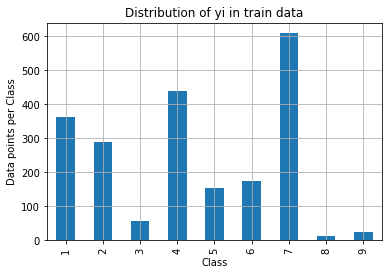

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


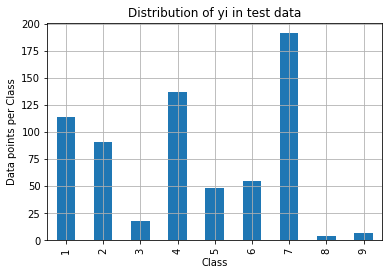

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


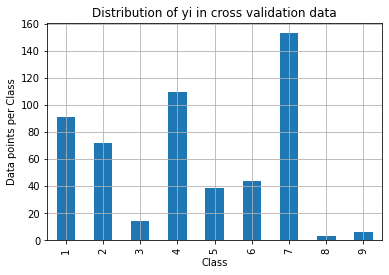

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [ ]:
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


# **Prediction using a Random Model**
<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))

    
    labels = [1,2,3,4,5,6,7,8,9]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

actual y_cv length : 532
test data length : 665 CV data length : 532
Log loss on Cross Validation Data using Random Model 2.4975502359490545
Log loss on Test Data using Random Model 2.5368291450201887
y_test shape : (665,) test_predicted_y shape : (665, 9)
-------------------- Confusion matrix --------------------


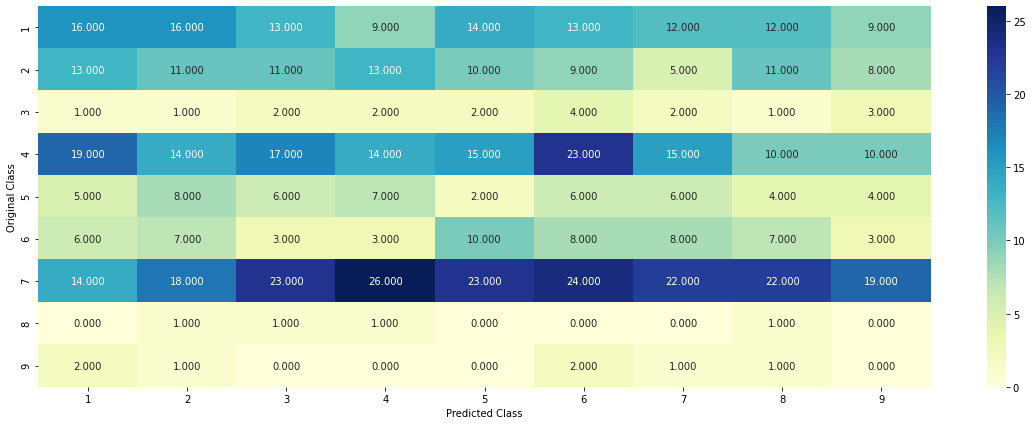

-------------------- Precision matrix (Columm Sum=1) --------------------


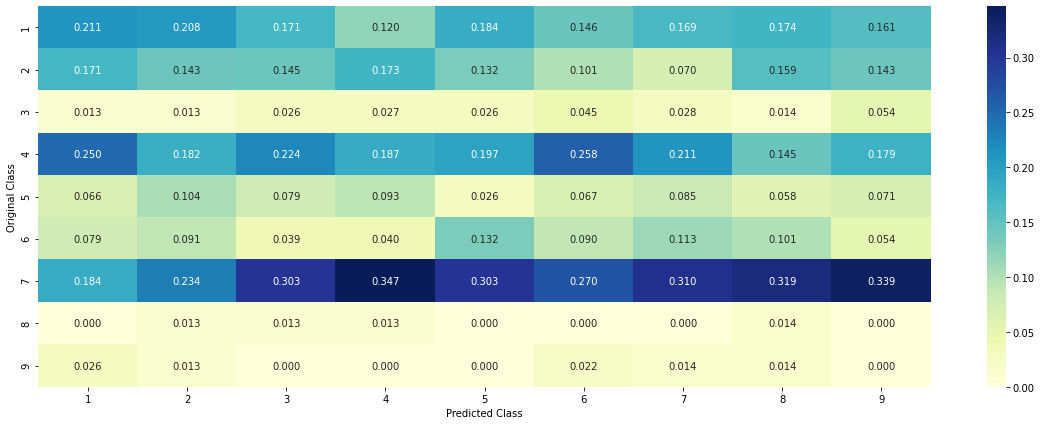

-------------------- Recall matrix (Row sum=1) --------------------


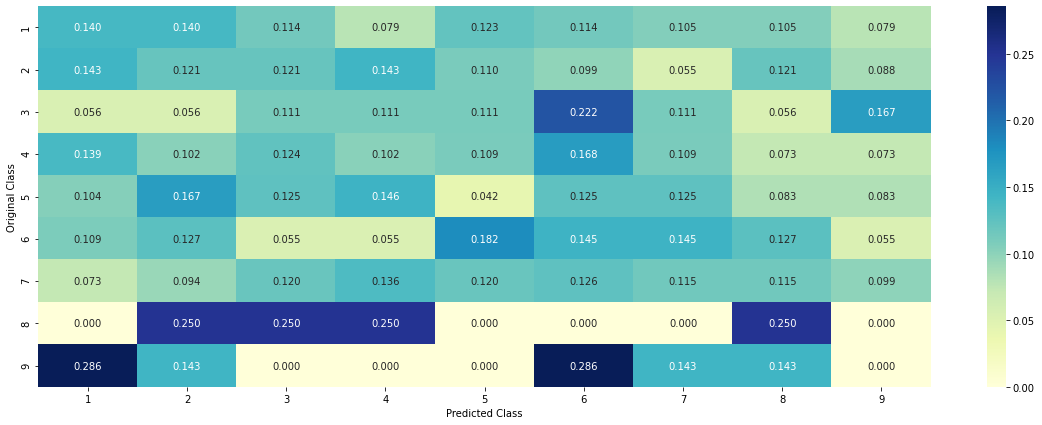

In [ ]:
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]
print("actual y_cv length :" , y_cv.shape[0])
print("test data length :" ,test_data_len , "CV data length :" ,cv_data_len )
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))
print("y_test shape :" , y_test.shape , "test_predicted_y shape :" ,test_predicted_y.shape )


predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

# **Featurization of 'Gene' , 'Variation' and 'Text' Feature**
One Hot Encoding of Gene and variation feature.

Tf-IDF transformation of Text feature 


In [ ]:
#one hot encoding of gene and variation feature
variation_vectorizer = CountVectorizer()
train_variation_tfidf = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_tfidf = variation_vectorizer.transform(test_df['Variation'])
cv_variation_tfidf = variation_vectorizer.transform(cv_df['Variation'])


gene_vectorizer = CountVectorizer()
train_gene_tfidf= gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_tfidf= gene_vectorizer.transform(test_df['Gene'])
cv_gene_tfidf= gene_vectorizer.transform(cv_df['Gene'])

#tfidf transformation of Text Feature
tfidf = TfidfVectorizer(lowercase=False, )
train_text_tfidf = tfidf.fit_transform(train_df['TEXT'])
train_text_tfidf = normalize(train_text_tfidf, axis=0)

cv_text_tfidf  = tfidf.transform(cv_df['TEXT'])
cv_text_tfidf = normalize(cv_text_tfidf, axis=0)

test_text_tfidf = tfidf.transform(test_df['TEXT'])
test_text_tfidf = normalize(test_text_tfidf, axis=0)

# don't forget to normalize every feature


# **SGD Classifier using 'log' as loss**

For values of alpha =  1e-05 The log loss is: 1.653455200445784
For values of alpha =  0.0001 The log loss is: 1.3261437650022536
For values of alpha =  0.001 The log loss is: 1.2703988826328154
For values of alpha =  0.01 The log loss is: 1.5972052391030627
For values of alpha =  0.1 The log loss is: 1.7891754755824698
For values of alpha =  1 The log loss is: 1.8302661415918664


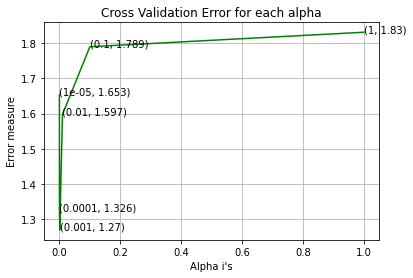

For values of best alpha =  0.001 The train log loss is: 0.6689493020136136
For values of best alpha =  0.001 The cross validation log loss is: 1.2703988826328154
For values of best alpha =  0.001 The test log loss is: 1.3747202562264162


In [ ]:
alpha = [10 ** x for x in range(-5, 1)]


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_tfidf, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_tfidf, y_train)
    predict_y = sig_clf.predict_proba(cv_text_tfidf)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_tfidf, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_tfidf, y_train)

predict_y1 = sig_clf.predict_proba(train_text_tfidf)
predict_y2 = sig_clf.predict_proba(cv_text_tfidf)
predict_y3 = sig_clf.predict_proba(test_text_tfidf)

print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y1, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y2, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y3, labels=clf.classes_, eps=1e-15))


In [ ]:
train_gene_var_onehotCoding = hstack((train_gene_tfidf,train_variation_tfidf))
test_gene_var_onehotCoding = hstack((test_gene_tfidf,test_variation_tfidf))
cv_gene_var_onehotCoding = hstack((cv_gene_tfidf,cv_variation_tfidf))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_tfidf)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_tfidf)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_tfidf)).tocsr()
cv_y = np.array(list(cv_df['Class']))


# **MultiNomial NB**

for alpha = 1e-05
Log Loss : 1.4179247272430882
for alpha = 0.0001
Log Loss : 1.4068691080254851
for alpha = 0.001
Log Loss : 1.3850927459822426
for alpha = 0.1
Log Loss : 1.2383953038901294
for alpha = 1
Log Loss : 1.1943506561232506
for alpha = 10
Log Loss : 1.2667414847027505
for alpha = 100
Log Loss : 1.3436871767175467
for alpha = 1000
Log Loss : 1.3367633790322124


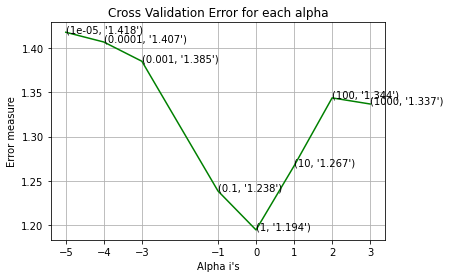

For values of best alpha =  1 The train log loss is: 0.6376886630609522
For values of best alpha =  1 The cross validation log loss is: 1.1943506561232506
For values of best alpha =  1 The test log loss is: 1.2737455388243775


In [ ]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [ ]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])

Log Loss : 1.1943506561232506
Number of missclassified point : 0.40601503759398494


# **Observations**

LogLoss using a RandomModel is 2.53 which is way higher than 1.37 of SGD classifier with loss as 'log'.
The Best Performance we got using MultiNomial NB.
Logloss of Naive Bayes is 1.27 which is lower than both the other models.